<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/Global_CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download atharvasoundankar/global-cybersecurity-threats-2015-2024

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
License(s): CC0-1.0
  0% 0.00/47.0k [00:00<?, ?B/s]
100% 47.0k/47.0k [00:00<00:00, 159MB/s]


In [ ]:
!unzip /content/global-cybersecurity-threats-2015-2024.zip

Archive:  /content/global-cybersecurity-threats-2015-2024.zip
  inflating: Global_Cybersecurity_Threats_2015-2024.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Global_Cybersecurity_Threats_2015-2024.csv")
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
df.isna().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [ ]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


# Threats by Year

In [ ]:
df["Year"].describe()

,Year
count,3000.000000
mean,2019.570333
std,2.857932
min,2015.000000
25%,2017.000000
50%,2020.000000
75%,2022.000000
max,2024.000000


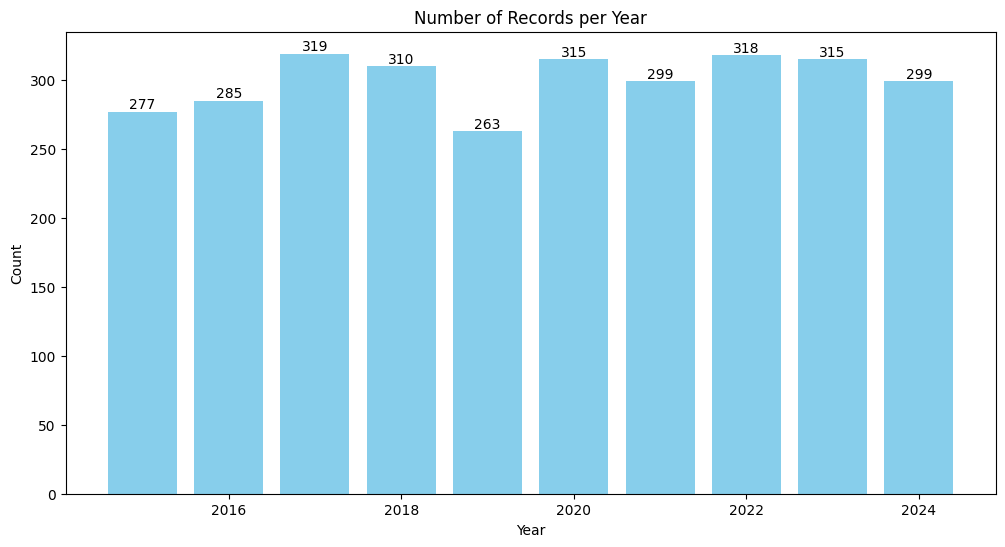

In [ ]:
year_counts = df["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

bars = plt.bar(year_counts.index, year_counts.values, color="skyblue")
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.bar_label(bars)
plt.show()

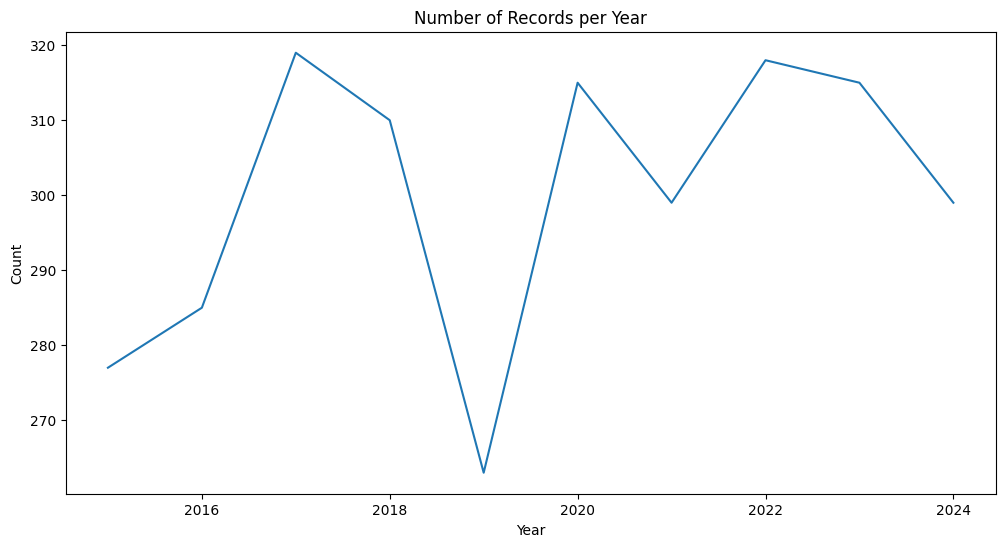

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(year_counts)
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

As we can see, the **highest number of cyberattacks occurred in 2017 and 2022**, with each year recording **around 320 major incidents**.
These spikes suggest that something significant might have happened during those years, perhaps **emerging vulnerabilities, global security breaches, or the rise of new attack trends** such as ransomware or supply chain attacks.

In the **next visualizations**, we’ll dive deeper to uncover the reasons behind these peaks, exploring **what caused these attacks, which sectors were most affected, and how much financial loss they led to.**
This will help us understand not just *when* attacks happened, but *why* they surged during specific periods.


# Let's see Attack Types

In [ ]:
attack_counts = df["Attack Type"].value_counts()
attack_counts

,count
Attack Type,
DDoS,531
Phishing,529
SQL Injection,503
Ransomware,493
Malware,485
Man-in-the-Middle,459


Here’s a brief overview of each type:

* **DDoS (Distributed Denial of Service):** Overwhelms a server or network with massive traffic, making it unavailable to users.
* **Phishing:** Tricks users into revealing sensitive information (like passwords) through fake emails or websites.
* **SQL Injection:** Exploits vulnerabilities in web applications to access or manipulate databases.
* **Ransomware:** Encrypts data and demands payment for decryption.
* **Malware:** A broad term for any malicious software designed to harm or steal information.
* **Man-in-the-Middle (MITM):** Intercepts communication between two parties to steal or alter data.

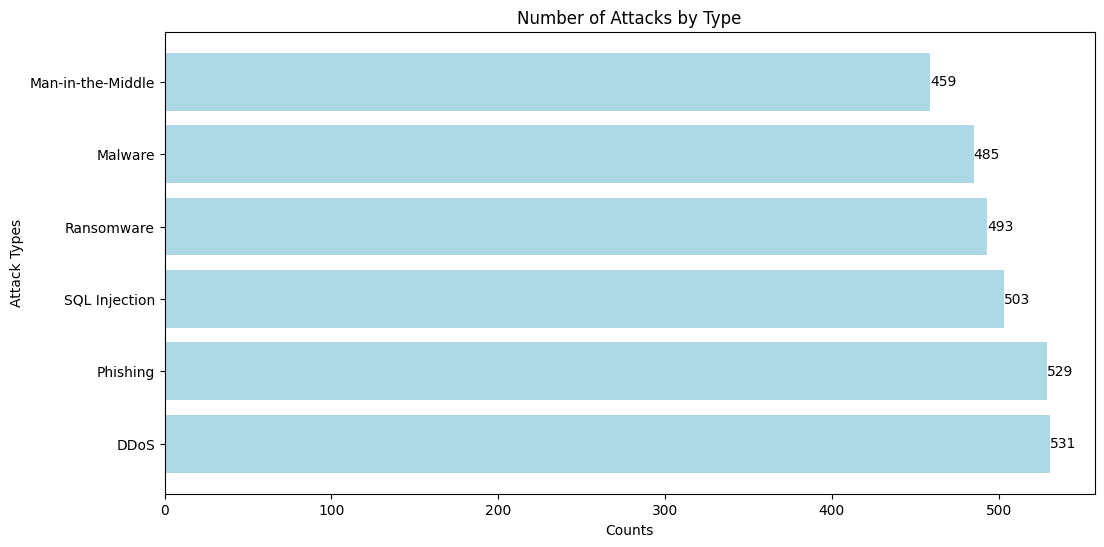

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.barh(attack_counts.index, attack_counts.values, color="lightBlue")
plt.title("Number of Attacks by Type")
plt.xlabel("Counts")
plt.ylabel("Attack Types")
plt.bar_label(bars)
plt.show()

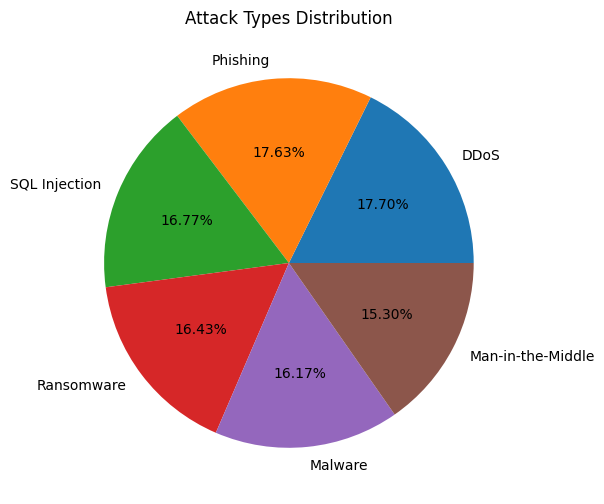

In [ ]:
plt.figure(figsize=(6, 6))

plt.pie(attack_counts, labels=attack_counts.index, autopct="%1.2f%%")
plt.title("Attack Types Distribution")
plt.show()

As we can see, the **most frequent attack types** are **DDoS** and **Phishing**, which are among the **most common and disruptive forms of cyberattacks** today.
Following them are **SQL Injection**, **Ransomware**, **Malware**, and **Man-in-the-Middle (MITM)** attacks — each representing a different method of exploiting systems or users.

This distribution shows that **attackers often rely on easily scalable or socially engineered techniques** (like DDoS and Phishing) rather than highly technical exploits.

Overall, these attacks highlight how **both human error and system vulnerabilities** remain key entry points for cybercriminals.


#Where are the most attacks?

In [ ]:
target_counts = df["Target Industry"].value_counts()
target_counts

,count
Target Industry,
IT,478
Banking,445
Healthcare,429
Retail,423
Education,419
Government,403
Telecommunications,403


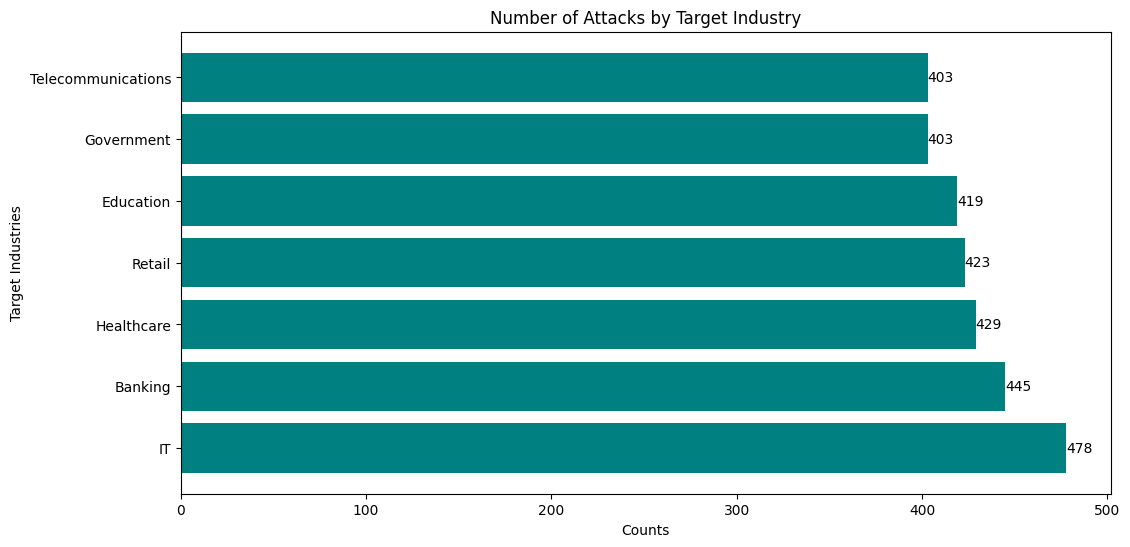

In [ ]:
plt.figure(figsize=(12, 6))

bars = plt.barh(target_counts.index, target_counts.values, color="teal")
plt.title("Number of Attacks by Target Industry")
plt.xlabel("Counts")
plt.ylabel("Target Industries")
plt.bar_label(bars)
plt.show()

The data shows that the IT industry experienced the highest number of attacks with 478 incidents, followed by the Banking sector with 445.
The Healthcare industry recorded 429 attacks, and the Retail sector closely followed with 423.
Next are the Education sector with 419, and both the Government and Telecommunications industries with 403 attacks each.

Overall, these numbers highlight that attacks occurred across a wide range of industries, with IT, Banking, and Healthcare being the most affected among them.

# Let's analyze financial loss

In [ ]:
from scipy.stats import skew


def describtive_statistics(data):
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")

    print(f"Mean: {np.mean(data)}")
    print(f"Median: {np.median(data)}")
    print(f"Standard deviation: {np.std(data)}")
    print(f"Variation: {np.var(data)}")

    print(f"Skewness: {skew(data)}")

In [ ]:
financial_loss_data = df["Financial Loss (in Million $)"]

describtive_statistics(financial_loss_data)

Minimum: 0.5
Maximum: 99.99
Mean: 50.49297
Median: 50.795
Standard deviation: 28.78661625152276
Variation: 828.6692752124342
Skewness: -0.01685196317361049


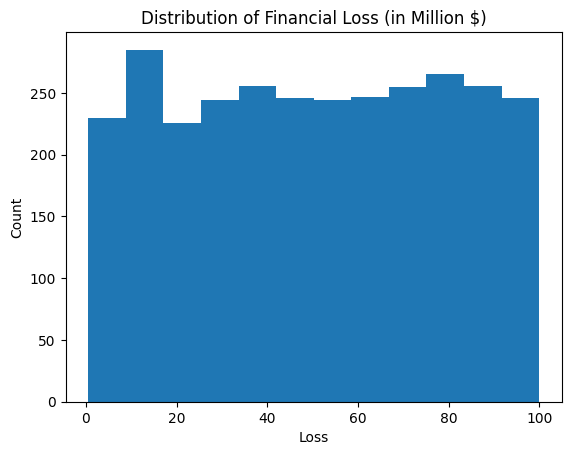

In [ ]:
bins = int(1 + np.log2(len(financial_loss_data)))

plt.hist(financial_loss_data, bins=bins)
plt.title("Distribution of Financial Loss (in Million $)")
plt.xlabel("Loss")
plt.ylabel("Count")
plt.show()

# What is the general Incident Resolution Time?

In [ ]:
resolution_time = df["Incident Resolution Time (in Hours)"]

describtive_statistics(resolution_time)

Minimum: 1
Maximum: 72
Mean: 36.476
Median: 37.0
Standard deviation: 20.567338768056526
Variation: 423.01542400000096
Skewness: 0.011098250333550965


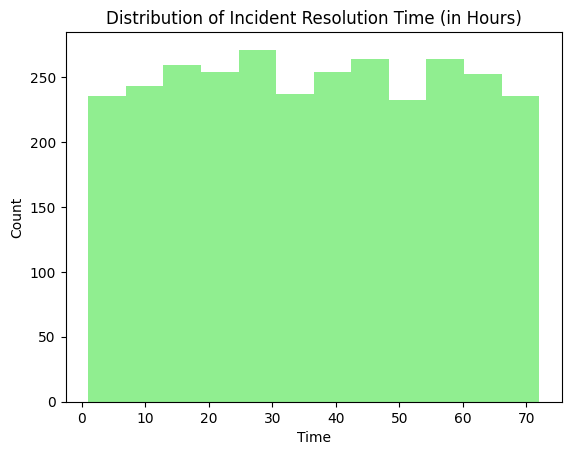

In [ ]:
plt.hist(resolution_time, bins=bins, color="lightGreen")
plt.title("Distribution of Incident Resolution Time (in Hours)")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

# What types of attacks occur most frequently in different target industries

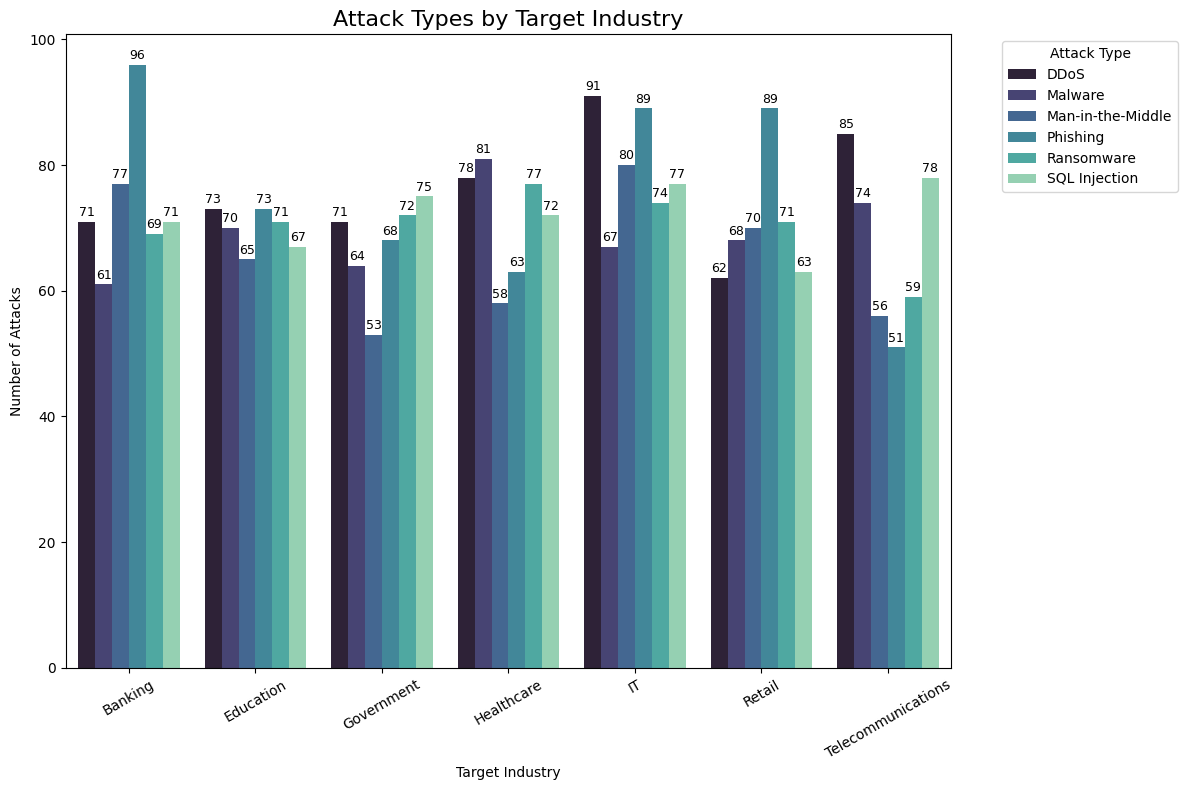

In [ ]:
data = df.groupby(["Target Industry", "Attack Type"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Target Industry", y="Count", hue="Attack Type", data=data, palette="mako")

plt.title("Attack Types by Target Industry", fontsize=16)
plt.xlabel("Target Industry")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=30)
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2, fontsize=9)

plt.show()

In [ ]:
modes = df.groupby("Target Industry")["Attack Type"].agg(lambda x: x.mode()[0]).reset_index()
modes

,Target Industry,Attack Type
0,Banking,Phishing
1,Education,DDoS
2,Government,SQL Injection
3,Healthcare,Malware
4,IT,DDoS
5,Retail,Phishing
6,Telecommunications,DDoS


In [ ]:
modes_count = (
    df.groupby("Target Industry")["Attack Type"]
      .agg(lambda x: x.value_counts().head(1))
      .reset_index()
)
modes_count

,Target Industry,Attack Type
0,Banking,96
1,Education,73
2,Government,75
3,Healthcare,81
4,IT,91
5,Retail,89
6,Telecommunications,85


In [ ]:
industry_attacks = pd.merge(modes, modes_count, how="inner", on="Target Industry")

industry_attacks = industry_attacks.rename(columns={
    "Attack Type_x": "Attack_Type",
    "Attack Type_y": "Count"
})

industry_attacks

,Target Industry,Attack_Type,Count
0,Banking,Phishing,96
1,Education,DDoS,73
2,Government,SQL Injection,75
3,Healthcare,Malware,81
4,IT,DDoS,91
5,Retail,Phishing,89
6,Telecommunications,DDoS,85


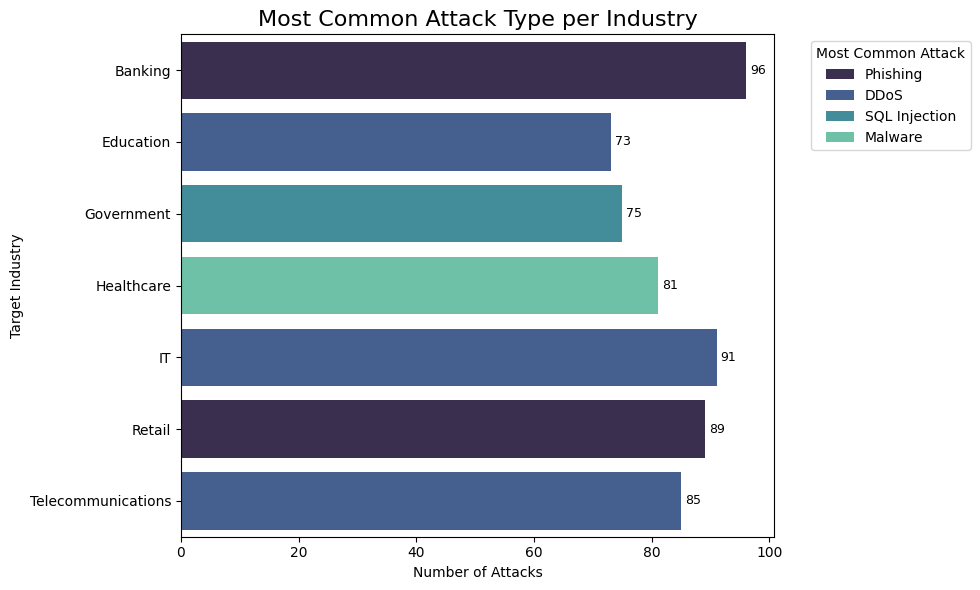

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y="Target Industry",
    x="Count",
    hue="Attack_Type",
    data=industry_attacks,
    palette="mako"
)

plt.title("Most Common Attack Type per Industry", fontsize=16)
plt.xlabel("Number of Attacks")
plt.ylabel("Target Industry")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

plt.legend(title="Most Common Attack", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Banking → Phishing (96 attacks):
Phishing is the easiest way for attackers to steal login credentials, credit card details, or account information. Since banks directly handle money, phishing emails and fake websites are effective tools for tricking customers or employees into revealing sensitive data.

Education → DDoS (73 attacks):
Educational institutions often have publicly accessible systems and weaker network protection. DDoS attacks are used to disrupt online classes, portals, or exams, making them a common issue in this sector.

Government → SQL Injection (75 attacks):
Government websites and databases often hold citizen and administrative records. SQL Injection lets attackers manipulate databases and extract confidential data, making it a preferred method against government systems.

Healthcare → Malware (81 attacks):
Healthcare organizations deal with sensitive patient data and rely heavily on continuous access to systems. Malware, especially ransomware, can lock critical systems until a ransom is paid, causing major operational and safety risks.

IT → DDoS (91 attacks):
IT companies run servers, cloud systems, and online platforms, making them ideal targets for DDoS attacks that can overload services and cause downtime, damaging both reputation and service continuity.

Retail → Phishing (89 attacks):
Retail businesses process online transactions and store customer payment information. Phishing scams are often used to steal customer or employee login data, or trick people into fake payment sites.

Telecommunications → DDoS (85 attacks):
The telecom industry provides internet and communication services, making it a key target for DDoS attacks aimed at disrupting connectivity or testing the resilience of large-scale networks.

# Financial Losses per Industry

## Average Loss

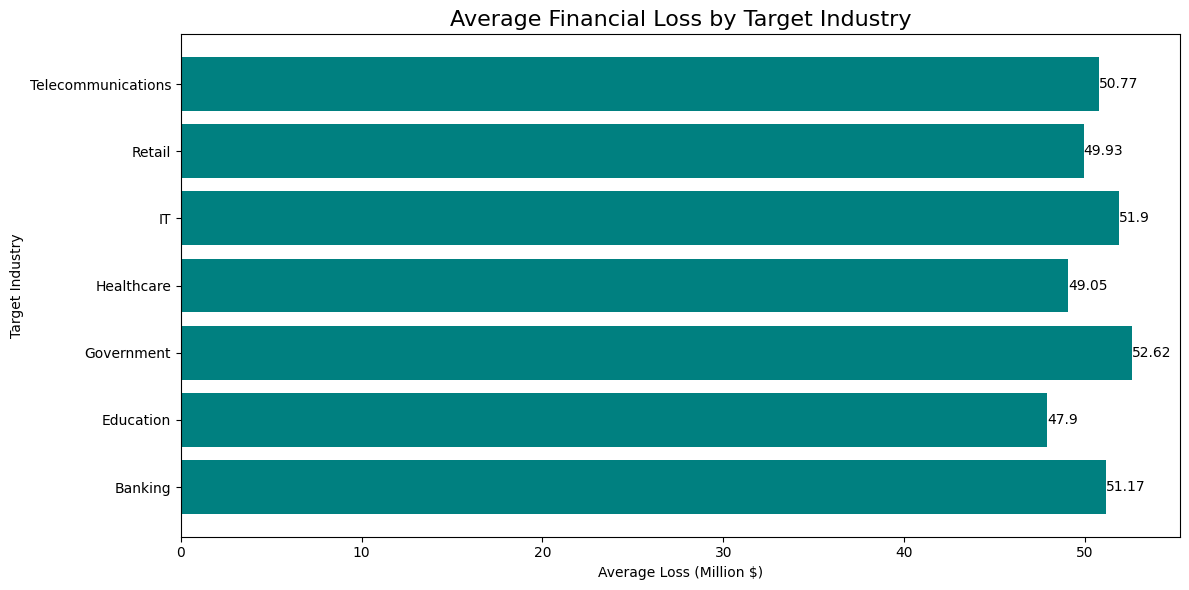

In [ ]:
loss_industry_avg = df.groupby("Target Industry")["Financial Loss (in Million $)"].mean().apply(lambda x: round(x, 2))

plt.figure(figsize=(12, 6))
bars = plt.barh(loss_industry_avg.index, loss_industry_avg.values, color="teal")

plt.title("Average Financial Loss by Target Industry", fontsize=16)
plt.xlabel("Average Loss (Million $)")
plt.ylabel("Target Industry")
plt.bar_label(bars)
plt.tight_layout()
plt.show()

## Total loss

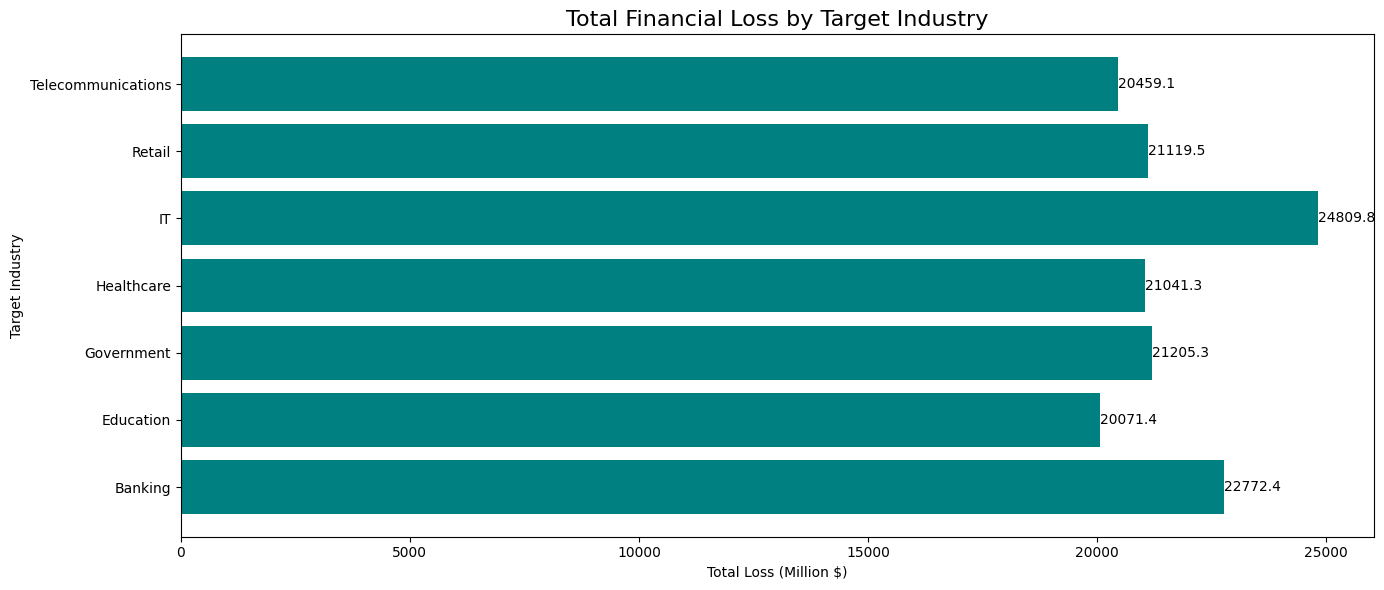

In [ ]:
loss_industry_sum = df.groupby("Target Industry")["Financial Loss (in Million $)"].sum()

plt.figure(figsize=(14, 6))
bars = plt.barh(loss_industry_sum.index, loss_industry_sum.values, color="teal")

plt.title("Total Financial Loss by Target Industry", fontsize=16)
plt.xlabel("Total Loss (Million $)")
plt.ylabel("Target Industry")
plt.bar_label(bars)
plt.tight_layout()
plt.show()

## Report about Losses per Industry

The data reveals that all industries suffer significant financial losses due to cyberattacks, but the IT, Government, and Banking sectors stand out as the most affected in terms of both average and total losses.

1. IT Industry – The Highest Total Loss (24,809.83M)

The IT sector experiences the greatest overall financial loss, mainly because of its large-scale digital infrastructure and the critical role it plays in supporting other industries. Even a small disruption in IT systems can have a chain reaction across multiple businesses.
Although the average loss per attack (51.90M) is moderate compared to Government or Banking, the high number of incidents drives up the total loss.

2. Government – The Highest Average Loss (52.62M)

Government systems face the most expensive individual attacks, as they often involve critical data breaches or nationwide service disruptions. The sensitivity of data—such as citizen information, national security data, and public records—makes recovery and damage control extremely costly.
Hence, even though the total number of attacks may be slightly lower than in IT, each incident has a far greater impact.

3. Banking – Both High Average Loss (51.17M) and Total Loss (22,772.39M)

The banking sector remains one of the most financially attractive targets for attackers. The direct access to funds, coupled with reputation risks and regulatory penalties, results in heavy losses both per incident and overall.
Financial institutions are also frequent phishing and ransomware targets, which amplify their vulnerability.

4. Education, Healthcare, Retail, and Telecommunications – Moderate Losses

While these industries report slightly lower average losses, they are still significant.

Education (47.90M) and Healthcare (49.05M) institutions often face ransomware attacks due to weaker security frameworks.

Retail (49.93M) suffers primarily from data breaches exposing customer payment information.

Telecommunications (50.77M) losses arise from service disruptions and data theft, which can affect millions of users simultaneously.

# Financial Loss per Year

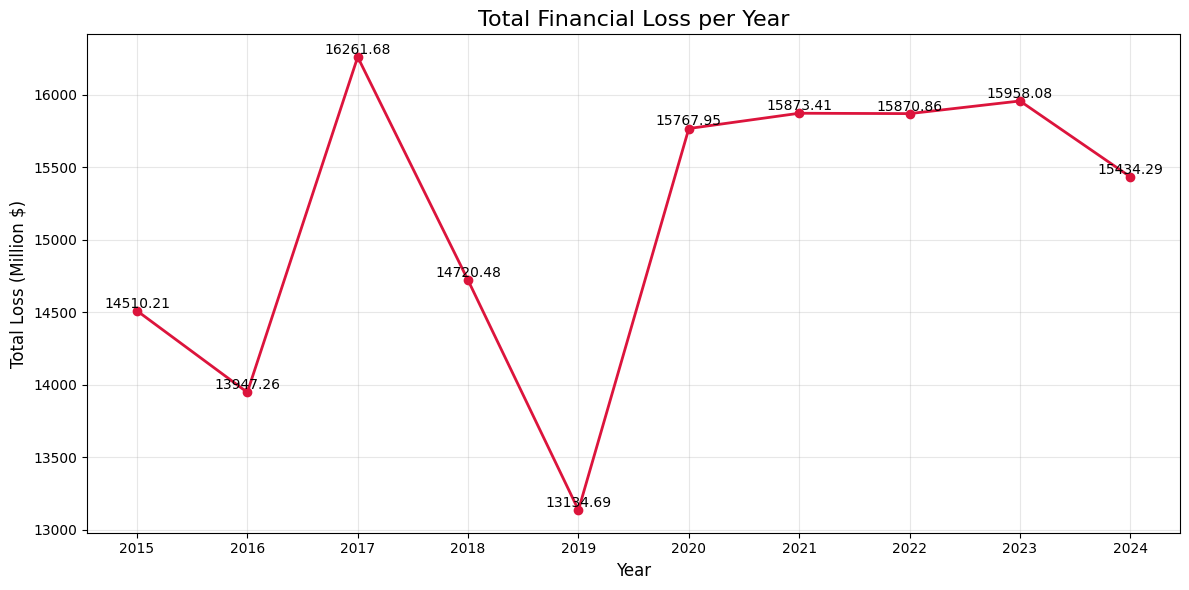

In [ ]:
total_losses_year = df.groupby("Year")["Financial Loss (in Million $)"].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_losses_year.index, total_losses_year.values, marker='o', color='crimson', linewidth=2)

plt.title("Total Financial Loss per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Loss (Million $)", fontsize=12)
plt.xticks(total_losses_year.index)

for x, y in zip(total_losses_year.index, total_losses_year.values):
    plt.text(x, y + 0.5, f"{y:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# What is the most Security Vulnerability Types?

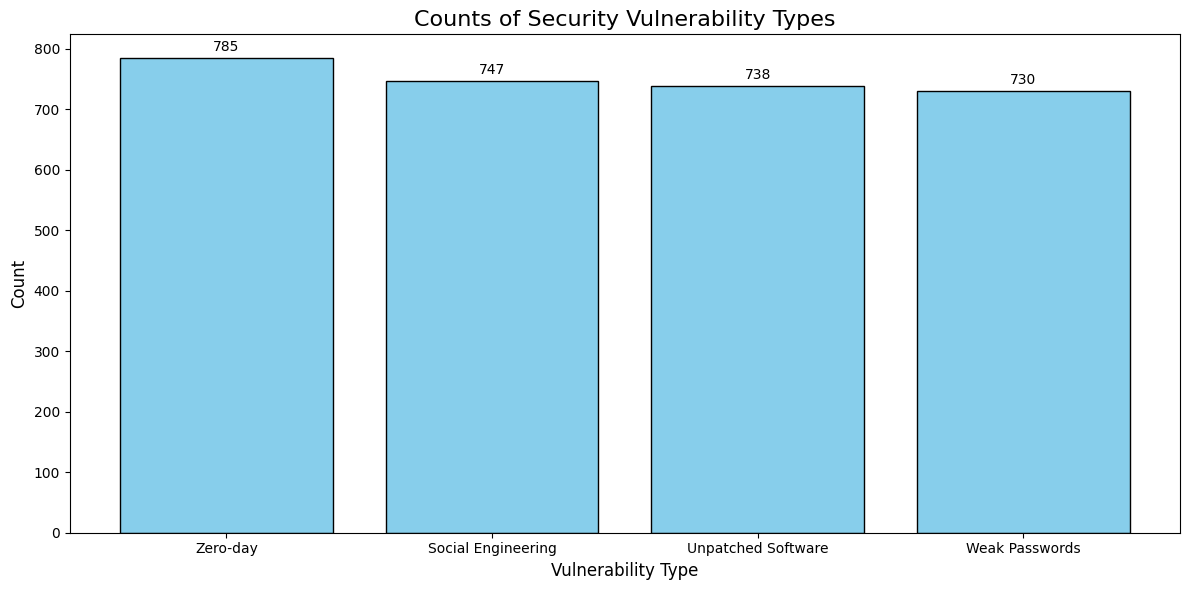

In [ ]:
vulnerability_counts = df["Security Vulnerability Type"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(vulnerability_counts.index, vulnerability_counts.values, color="skyblue", edgecolor="black")

plt.bar_label(bars, padding=3)

plt.title("Counts of Security Vulnerability Types", fontsize=16)
plt.xlabel("Vulnerability Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

The data shows that the most common security vulnerabilities are:

Zero-day (785 incidents) – These are vulnerabilities unknown to software developers or vendors at the time they are exploited. Since no patch or fix exists yet, attackers can exploit them immediately, making them extremely dangerous.

Social Engineering (747 incidents) – This type exploits human behavior rather than software flaws. Attackers manipulate people into revealing confidential information, such as passwords or financial data, often through phishing emails or phone calls.

Unpatched Software (738 incidents) – Vulnerabilities in software that have available fixes but haven’t been updated. Attackers take advantage of outdated systems to gain unauthorized access or control.

Weak Passwords (730 incidents) – Accounts with easily guessable or reused passwords remain a top target. Weak passwords allow attackers to gain access quickly without exploiting complex system flaws.

# Most affected Users per Country

## Average affected Users

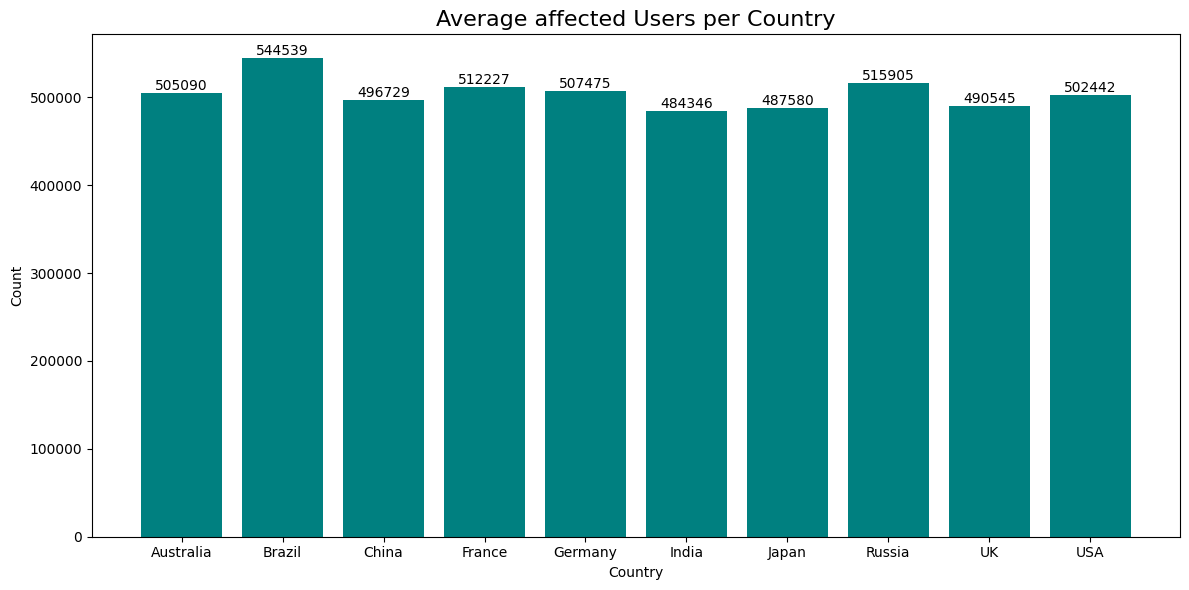

In [ ]:
affectedUsers_country_avg = df.groupby("Country")["Number of Affected Users"].mean().apply(lambda x: round(x, 2))

plt.figure(figsize=(12, 6))
bars = plt.bar(affectedUsers_country_avg.index, affectedUsers_country_avg.values, color="teal")

plt.title("Average affected Users per Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Count")
plt.bar_label(bars)
plt.tight_layout()
plt.show()

## Total affected Users

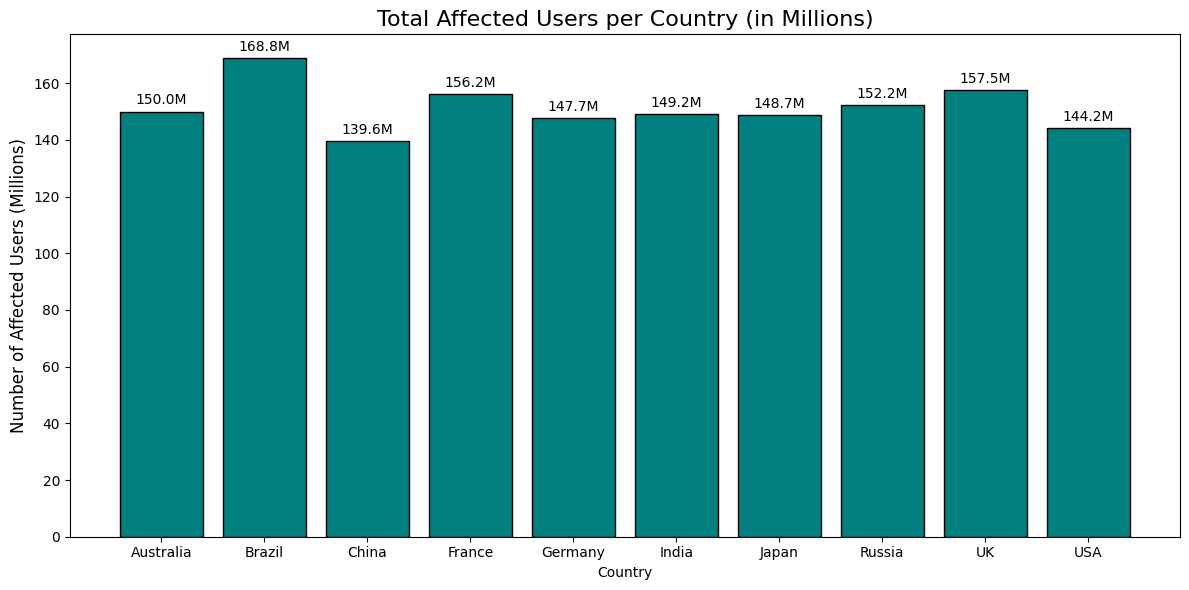

In [ ]:
affectedUsers_millions = df.groupby("Country")["Number of Affected Users"].sum() / 1e6

plt.figure(figsize=(12, 6))
bars = plt.bar(affectedUsers_millions.index, affectedUsers_millions.values, color="teal", edgecolor="black")

plt.bar_label(bars, labels=[f"{val:.1f}M" for val in affectedUsers_millions.values], padding=3)

plt.title("Total Affected Users per Country (in Millions)", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Number of Affected Users (Millions)", fontsize=12)
plt.tight_layout()
plt.show()

Looking at the average number of affected users per incident, Brazil stands out with 544,539 users, followed by Russia (515,905) and France (512,227). These countries show the largest impact per individual attack, indicating that when an incident occurs, it affects a high number of users on average.

In contrast, India (484,346), Japan (487,580), and the UK (490,545) have slightly lower averages, suggesting that individual attacks in these countries affect fewer users on average.

When we consider the total number of affected users, Brazil again tops the list with 168.81 million, followed by the UK (157.46M) and France (156.23M). Interestingly, some countries like India and Japan have a lower total despite moderate average impacts, likely due to fewer overall incidents compared to countries with similar population exposure.

**Key Takeaways:**

 - Brazil consistently ranks highest both in average and total affected users, showing it experienced both frequent attacks and large-scale incidents.

 - Russia, France, and the UK also face high average or total impacts, highlighting regions where cyberattacks reach many users per incident.

 - Differences between average and total indicate that a country might have few very large attacks (high average, moderate total) or many smaller attacks (moderate average, high total).

This comparison helps to understand not only where attacks happen most often, but also which regions experience the greatest user impact per attack.